In [1]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainin.csv
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainlabel.csv

--2022-04-14 09:16:06--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 961560 (939K) [text/plain]
Saving to: ‘music30s_trainin.csv’

music30s_trainin.cs 100%[===================>] 939.02K  --.-KB/s    in 0.03s   

2022-04-14 09:16:07 (29.4 MB/s) - ‘music30s_trainin.csv’ saved [961560/961560]

--2022-04-14 09:16:07--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainlabel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connec

In [2]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [4]:
x_data=pd.read_csv("music30s_trainin.csv")
y_data=pd.read_csv("music30s_trainlabel.csv")
del x_data["Unnamed: 0"]

In [5]:
len(x_data.columns)

58

In [7]:
x_data.columns[6]

'spectral_centroid_var'

In [ ]:
x_data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,661504,0.432846,0.086019,0.142929,0.004758,3089.637185,1.311379e+06,2973.703815,271609.298651,6574.771380,...,-4.922164,106.523758,-5.005428,74.781494,1.383756,75.593880,-2.103029,82.962410,-2.102471,56.383205
1,661504,0.398761,0.090296,0.092221,0.001716,2170.544505,2.470449e+05,2054.465986,111598.068567,4306.240937,...,5.730653,62.366760,-7.947048,57.781807,5.203198,71.078148,-1.486348,55.774078,0.463148,60.979748
2,661794,0.375874,0.081557,0.099977,0.001147,2321.871533,5.433791e+05,2545.325000,155899.829366,4580.418732,...,-0.442143,51.811581,-3.584000,51.066288,-5.018315,47.032211,-2.522085,35.879490,-4.752133,33.392231
3,661794,0.424385,0.085162,0.175975,0.003569,1886.954809,2.533910e+05,1913.258610,123441.419116,3828.288761,...,0.975607,48.149387,-6.554968,35.716187,-0.689079,46.263088,-2.127222,47.571030,-1.508367,50.199821
4,661794,0.456134,0.075901,0.097609,0.000364,2269.128009,1.357942e+05,1928.953538,88450.196573,4186.459372,...,6.971109,40.836742,-12.668804,40.830875,-0.556885,31.079792,-11.754225,37.405830,-1.540814,30.325340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,661504,0.469879,0.086839,0.144261,0.008266,2868.233682,1.353624e+06,2676.125867,225551.708478,5796.886499,...,1.998499,69.473038,-5.572653,90.371826,7.771932,123.477547,-1.518996,96.361115,5.007198,67.499344
896,661794,0.290960,0.091076,0.089215,0.003113,1109.352784,1.386997e+05,1463.217702,37692.267055,2243.341758,...,-0.187531,100.648956,-2.823469,87.407570,-2.675381,77.598251,0.740614,76.061050,-0.530982,67.630028
897,661504,0.454745,0.086461,0.223571,0.013054,3123.151410,9.471130e+05,2970.246872,221789.180783,6616.305648,...,-1.443429,46.262592,-1.865332,50.931961,-0.019046,65.033195,-0.727255,73.956261,-0.986098,66.340393
898,661794,0.437934,0.094721,0.252890,0.013661,1821.519761,7.452975e+05,2522.060569,309565.051070,4003.377184,...,-0.989756,49.640724,-5.466094,51.848621,-1.297010,42.504318,-4.247594,39.925827,-5.021968,58.707275


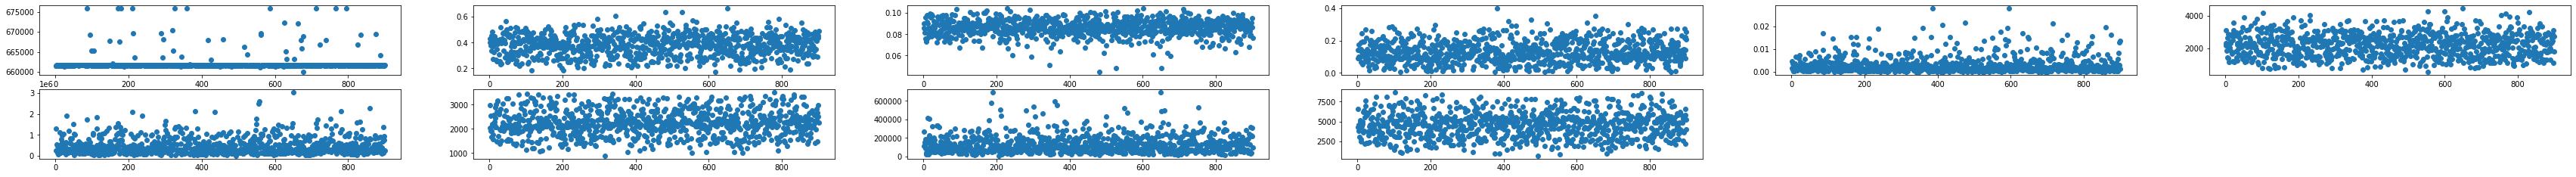

In [ ]:
plt.figure(figsize=(60,20))
j=1
for i in x_data.columns[:10]:
  plt.subplot(10,6,j)
  plt.scatter([i+1 for i in range(len(x_data[[i]]))],x_data[[i]])
  j+=1

In [ ]:
x_data_array=np.array(x_data)

In [ ]:
x_data_array

array([[ 6.61504000e+05,  4.32845771e-01,  8.60194936e-02, ...,
         8.29624100e+01, -2.10247087e+00,  5.63832054e+01],
       [ 6.61504000e+05,  3.98761123e-01,  9.02957469e-02, ...,
         5.57740784e+01,  4.63147700e-01,  6.09797478e+01],
       [ 6.61794000e+05,  3.75874370e-01,  8.15568641e-02, ...,
         3.58794899e+01, -4.75213289e+00,  3.33922310e+01],
       ...,
       [ 6.61504000e+05,  4.54744965e-01,  8.64610896e-02, ...,
         7.39562607e+01, -9.86098409e-01,  6.63403931e+01],
       [ 6.61794000e+05,  4.37933892e-01,  9.47214589e-02, ...,
         3.99258270e+01, -5.02196789e+00,  5.87072754e+01],
       [ 6.61794000e+05,  4.87559527e-01,  7.62977079e-02, ...,
         2.95810890e+01,  5.77088070e+00,  3.18504982e+01]])

In [ ]:
x_data_scaled=MinMaxScaler().fit_transform(x_data_array)

In [ ]:
x_data_scaled

array([[0.0951417 , 0.53057239, 0.69661944, ..., 0.18298519, 0.50502936,
        0.09722102],
       [0.0951417 , 0.46125879, 0.76846257, ..., 0.11137559, 0.57771129,
        0.10644901],
       [0.11348684, 0.41471692, 0.6216451 , ..., 0.05897651, 0.42996654,
        0.05106447],
       ...,
       [0.0951417 , 0.57510599, 0.70403847, ..., 0.15926448, 0.5366553 ,
        0.11721101],
       [0.11348684, 0.54091945, 0.84281668, ..., 0.06963389, 0.42232233,
        0.10188681],
       [0.11348684, 0.64183677, 0.53328873, ..., 0.04238755, 0.72807515,
        0.04796929]])

In [ ]:
x_data_scaled.shape

(900, 58)

In [ ]:
y_data_array=np.array(y_data["label"])

In [ ]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Logistic Regression


In [ ]:
clf=LogisticRegression(class_weight='balanced',max_iter=10000) 
clf_parameters = {
        'clf__solver':('newton-cg','lbfgs','liblinear'),
        'clf__C':[1,0.1,0.01]
        }

pipeline = Pipeline([   
    ('clf', clf),]) 

In [ ]:
parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_  

In [ ]:
clf

Pipeline(steps=[('clf',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, solver='newton-cg'))])

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.56      0.57      0.56        86
   classical       0.89      0.93      0.91        89
     country       0.68      0.62      0.65        91
       disco       0.57      0.56      0.56        89
      hiphop       0.72      0.58      0.64        91
        jazz       0.81      0.84      0.82        89
       metal       0.66      0.89      0.76        91
         pop       0.70      0.83      0.76        88
      reggae       0.68      0.67      0.67        91
        rock       0.49      0.34      0.40        95

    accuracy                           0.68       900
   macro avg       0.68      0.68      0.67       900
weighted avg       0.67      0.68      0.67       900



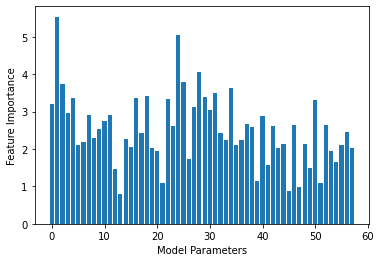

In [ ]:
importance = clf.steps[0][1].coef_
plt.bar([x for x in range(len(importance[0]))], [ np.linalg.norm(importance[:,i])  for i in range(len(importance[0]))] )
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

# Decision Tree Classifier


In [ ]:
clf = DecisionTreeClassifier(random_state=40)
clf_parameters = {
        'clf__criterion':('gini', 'entropy'), 
        'clf__max_features':('auto', 'sqrt', 'log2'),
        'clf__ccp_alpha':(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1),
        'clf__max_depth':(10,40,45,60),
        }

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

In [ ]:
parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.42      0.41      0.41        86
   classical       0.75      0.75      0.75        89
     country       0.44      0.43      0.44        91
       disco       0.41      0.45      0.43        89
      hiphop       0.45      0.45      0.45        91
        jazz       0.53      0.56      0.54        89
       metal       0.65      0.69      0.67        91
         pop       0.61      0.64      0.62        88
      reggae       0.48      0.44      0.46        91
        rock       0.33      0.28      0.30        95

    accuracy                           0.51       900
   macro avg       0.51      0.51      0.51       900
weighted avg       0.51      0.51      0.51       900



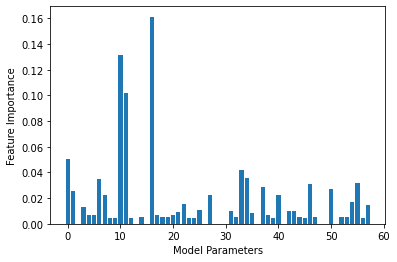

In [ ]:
importance = clf.steps[0][1].feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

# Random Forest Classifier


In [ ]:
clf = RandomForestClassifier(class_weight='balanced', max_depth=10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
clf.steps[0][1]

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', n_estimators=200)

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.81      0.71      0.76        86
   classical       0.91      0.92      0.92        89
     country       0.70      0.70      0.70        91
       disco       0.76      0.84      0.80        89
      hiphop       0.88      0.75      0.81        91
        jazz       0.81      0.84      0.82        89
       metal       0.86      0.91      0.89        91
         pop       0.81      0.89      0.85        88
      reggae       0.73      0.76      0.74        91
        rock       0.66      0.61      0.63        95

    accuracy                           0.79       900
   macro avg       0.79      0.79      0.79       900
weighted avg       0.79      0.79      0.79       900



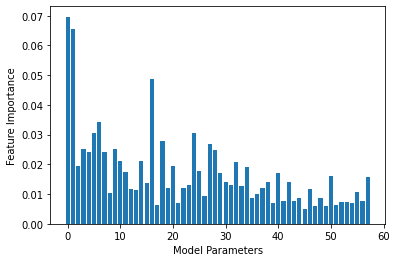

In [ ]:
importance = clf.steps[0][1].feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
filename = 'random_forest_classifier.sav'
pickle.dump(clf.steps[0][1], open(filename, 'wb'))

# Support Vector Machine

In [ ]:
clf = svm.SVC(class_weight='balanced',max_iter=50000,probability=False)  
clf_parameters = {
        'clf__C':(0.1,1,2,10,50,100),
        "clf__kernel":('linear','rbf','poly','sigmoid')
        }

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
clf

Pipeline(steps=[('clf', SVC(C=10, class_weight='balanced', max_iter=50000))])

In [ ]:
clf.steps[0][1].get_params

<bound method BaseEstimator.get_params of SVC(C=10, class_weight='balanced', max_iter=50000)>

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.78      0.83      0.80        86
   classical       0.94      0.94      0.94        89
     country       0.71      0.78      0.74        91
       disco       0.63      0.75      0.68        89
      hiphop       0.78      0.68      0.73        91
        jazz       0.87      0.88      0.87        89
       metal       0.90      0.88      0.89        91
         pop       0.75      0.74      0.74        88
      reggae       0.67      0.64      0.65        91
        rock       0.68      0.57      0.62        95

    accuracy                           0.77       900
   macro avg       0.77      0.77      0.77       900
weighted avg       0.77      0.77      0.77       900



In [ ]:
filename = 'SVC.sav'
pickle.dump(clf.steps[0][1], open(filename, 'wb'))

In [ ]:
#importance = clf.steps[0][1].coef_
#plt.bar([x for x in range(len(importance[0]))], [ np.linalg.norm(importance[:,i])  for i in range(len(importance[0]))] )
#plt.xlabel("Model Parameters")
#plt.ylabel("Feature Importance")
#plt.show()

# Multinomial Naive Bayes

In [ ]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
clf_parameters = {
        'clf__alpha':(0.1,0.5,1),
        }

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

x_data_scaled1=MinMaxScaler().fit_transform(x_data_array)

parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled1,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
x,y=x_data_scaled1,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.26      0.14      0.18        86
   classical       0.81      0.85      0.83        89
     country       0.46      0.43      0.44        91
       disco       0.44      0.28      0.34        89
      hiphop       0.76      0.41      0.53        91
        jazz       0.64      0.52      0.57        89
       metal       0.46      0.88      0.60        91
         pop       0.61      0.76      0.68        88
      reggae       0.50      0.56      0.53        91
        rock       0.27      0.32      0.29        95

    accuracy                           0.51       900
   macro avg       0.52      0.51      0.50       900
weighted avg       0.52      0.51      0.50       900



# K-Nearest Neighbours

In [ ]:
clf=KNeighborsClassifier()  
clf_parameters = {
        'clf__n_neighbors':(5,10,15,20),
        'clf__weights':('uniform', 'distance'),
        'clf__p':(1,2),
        'clf__algorithm':('auto', 'ball_tree', "kd_tree"),
        }

In [ ]:
clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
clf

Pipeline(steps=[('clf', KNeighborsClassifier(p=1, weights='distance'))])

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.81      0.70      0.75        86
   classical       0.87      0.93      0.90        89
     country       0.61      0.76      0.68        91
       disco       0.60      0.64      0.62        89
      hiphop       0.70      0.62      0.65        91
        jazz       0.85      0.79      0.82        89
       metal       0.91      0.78      0.84        91
         pop       0.81      0.74      0.77        88
      reggae       0.68      0.69      0.69        91
        rock       0.49      0.57      0.52        95

    accuracy                           0.72       900
   macro avg       0.73      0.72      0.72       900
weighted avg       0.73      0.72      0.72       900



# Adaboost

In [ ]:
be1 = KNeighborsClassifier(p=1, weights='distance')            
be2 = SVC(C=10, class_weight='balanced', max_iter=50000)
be3 = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=200)
clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)
clf_parameters = {
'clf__base_estimator':(be1,be2,be3),
'clf__random_state':(0,10)}

In [ ]:
pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=cv)          
grid.fit(x_data_scaled,y_data_array)     
clf= grid.best_estimator_ 

In [ ]:
x,y=x_data_scaled,y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

nested_score = cross_val_score(clf, X=x, y=y, cv=outer_cv, scoring=make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

In [ ]:
filename = 'Adaboost.sav'
pickle.dump(clf.steps[0][1], open(filename, 'wb'))